In [18]:
import pandas as pd
import numpy as np
import datetime as dt # for date data type
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df= pd.read_csv("data.csv")
df.head(5)

,Juhtumi nr,Toimumisaeg,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Aadress (PPA),Maja nr (PPA),Tänav (PPA),Ristuv tänav (PPA),...,Teekatte seisund [2],Sõiduradade arv,Lubatud sõidukiirus (PPA),Tee nr (PPA),Tee km (PPA),Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y
0,2000140000057,24.10.2014 08:45,2.0,0,1,1.0,Harju maakond Tallinn Kesklinna linnaosa Esto...,9,Estonia pst,NaN,...,Kuiv,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588678.0,542647.0
1,2000140000067,24.10.2014 13:45,2.0,0,1,2.0,Harju maakond Tallinn Põhja-Tallinna linnaosa...,NaN,Kopli tn,Telliskivi tn,...,Kuiv,NaN,30.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6589522.0,541467.0
2,2000140000123,8/11/14,2.0,0,1,2.0,Harju maakond Tallinn Pirita linnaosa Meriväl...,NaN,Merivälja tee,Mähe tee,...,Kuiv,NaN,50.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6593961.0,547646.0
3,2000140000235,17.11.2014 17:32,2.0,0,2,2.0,Harju maakond Keila vald,NaN,KEILA - HAAPSALU,NaN,...,Kuiv,NaN,90.0,17.0,"10,95",Pilvised olud,Pimeda aeg,Pimeda ajal valgustus ei põle,6569324.0,516628.0
4,2000150000442,28.04.2015 07:55,2.0,0,1,2.0,Harju maakond Tallinn Kesklinna linnaosa Pärn...,123a,Pärnu mnt,NaN,...,Märg,NaN,50.0,NaN,NaN,Vihmasadu,Valge aeg,Valge aeg,6586430.0,541953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15703,3140170029504,21.05.2017 09:35,3.0,0,1,2.0,Pärnu maakond VANA Audru vald Jõõpre küla,NaN,AUDRU - LAVASSAARE - VAHENURME,NaN,...,Kuiv,2,90.0,19103.0,7,Selged olud,Valge aeg,Valge aeg,6480481.0,519847.0
15704,3140170029565,21.05.2017 13:50,2.0,0,1,3.0,Rapla maakond Märjamaa vald Konuvere küla,NaN,NaN,NaN,...,Kuiv,2,90.0,NaN,NaN,Madal vastu paistev päike,Valge aeg,Valge aeg,6519056.0,524082.0
15705,3140170029903,22.05.2017 18:29,1.0,0,1,1.0,Harju maakond Nissi vald Jaanika küla,NaN,ÄÄSMÄE - HAAPSALU - ROHUKÜLA,NaN,...,Kuiv,NaN,90.0,9.0,14,Selged olud,Valge aeg,Valge aeg,6558038.0,519643.0
15706,3140170029934,22.05.2017 20:02,2.0,0,2,2.0,Tartu maakond Tartu linn Tartu linn Riia tn,126,Riia tn,Sanatooriumi tn,...,Kuiv,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15708 entries, 0 to 15707
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Juhtumi nr                                     15708 non-null  object 
 1   Toimumisaeg                                    15708 non-null  object 
 2   Isikuid                                        15633 non-null  float64
 3   Hukkunuid                                      15708 non-null  int64  
 4   Vigastatuid                                    15708 non-null  int64  
 5   Sõidukeid                                      15633 non-null  float64
 6   Aadress (PPA)                                  14601 non-null  object 
 7   Maja nr (PPA)                                  6686 non-null   object 
 8   Tänav (PPA)                                    14012 non-null  object 
 9   Ristuv tänav (PPA)                             275

In [21]:
# Convert data types to date/time, int etc
veerud_int=['Isikuid', 'Hukkunuid', "Vigastatuid", "Sõidukeid", "Kergliikurijuhi osalusel", "Jalakäija osalusel", "Kaassõitja osalusel", "Maastikusõiduki juhi osalusel", "Eaka (65+) mootorsõidukijuhi osalusel", "Bussijuhi osalusel", "Veoautojuhi osalusel", "Ühissõidukijuhi osalusel", "Sõiduautojuhi osalusel", "Mootorratturi osalusel", "Mopeedijuhi osalusel", "Jalgratturi osalusel", "Alaealise osalusel", "Turvavarustust mitte kasutanud isiku osalusel", "Esmase juhiloa omaniku osalusel", "Mootorsõidukijuhi osalusel", "Lubatud sõidukiirus (PPA)", "Tee nr (PPA)",  "GPS X", "GPS Y"]
veerud_cat=["Maakond (PPA)", "Omavalitsus (PPA)", "Asustus (PPA)", "Liiklusõnnetuse liik [1]", "Liiklusõnnetuse liik [3]", "Tüüpskeemi nr",  "Tüüpskeem [2]", "Tee tüüp [1]", "Tee tüüp [2]", "Tee element [1]", "Tee element [2]", "Tee objekt [2]", "Kurvilisus", "Tee tasasus", "Tee seisund", "Teekate", "Teekatte seisund [2]", "Sõiduradade arv", "Ilmastik [1]", "Valgustus [1]", "Valgustus [2]"]

df["Toimumisaeg"]=pd.to_datetime(df["Toimumisaeg"])
df[veerud_int] = df[veerud_int].astype('Int64', errors='ignore')
df[veerud_cat]=df[veerud_cat].astype("category", errors='ignore')

# no location
df=df.dropna(subset=["GPS X", "GPS Y"], inplace=True)

# Change the location cordinate format





# outside Estonia - possible outliers
# Assuming the bounding box coordinates are defined as follows:
min_lat = 57.5097   # Minimum latitude (southernmost point of Estonia)
max_lat = 59.6750   # Maximum latitude (northernmost point of Estonia)
min_lon = 21.3826   # Minimum longitude (westernmost point of Estonia)
max_lon = 28.2090   # Maximum longitude (easternmost point of Estonia)

# Filter out GPS points outside the bounding box
filtered_df = df[(df["GPS X"] >= min_lon) & (df["GPS X"] <= max_lon) & (df["GPS Y"] >= min_lat) & (df["GPS Y"] <= max_lat)]

In [27]:
df.head(5)

,Juhtumi nr,Toimumisaeg,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Aadress (PPA),Maja nr (PPA),Tänav (PPA),Ristuv tänav (PPA),...,Sõiduradade arv,Lubatud sõidukiirus (PPA),Tee nr (PPA),Tee km (PPA),Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y,"(GPS X, GPS Y)"
0,2000140000057,2014-10-24 08:45:00,2,0,1,1,Harju maakond Tallinn Kesklinna linnaosa Esto...,9,Estonia pst,NaN,...,NaN,50,<NA>,NaN,Selged olud,Valge aeg,Valge aeg,6588678,542647,None
1,2000140000067,2014-10-24 13:45:00,2,0,1,2,Harju maakond Tallinn Põhja-Tallinna linnaosa...,NaN,Kopli tn,Telliskivi tn,...,NaN,30,<NA>,NaN,Pilvised olud,Valge aeg,Valge aeg,6589522,541467,None
2,2000140000123,2014-08-11 00:00:00,2,0,1,2,Harju maakond Tallinn Pirita linnaosa Meriväl...,NaN,Merivälja tee,Mähe tee,...,NaN,50,<NA>,NaN,Pilvised olud,Valge aeg,Valge aeg,6593961,547646,None
3,2000140000235,2014-11-17 17:32:00,2,0,2,2,Harju maakond Keila vald,NaN,KEILA - HAAPSALU,NaN,...,NaN,90,17,"10,95",Pilvised olud,Pimeda aeg,Pimeda ajal valgustus ei põle,6569324,516628,None
4,2000150000442,2015-04-28 07:55:00,2,0,1,2,Harju maakond Tallinn Kesklinna linnaosa Pärn...,123a,Pärnu mnt,NaN,...,NaN,50,<NA>,NaN,Vihmasadu,Valge aeg,Valge aeg,6586430,541953,None


<Axes: xlabel='GPS X'>

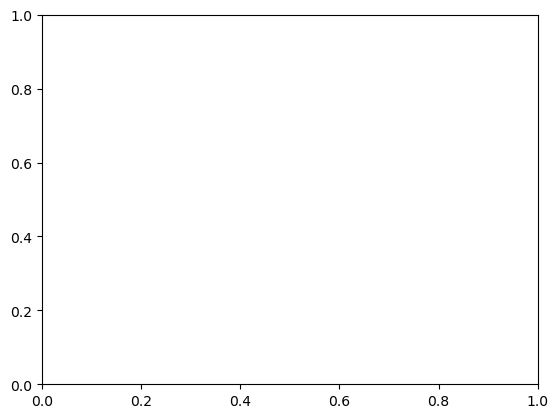

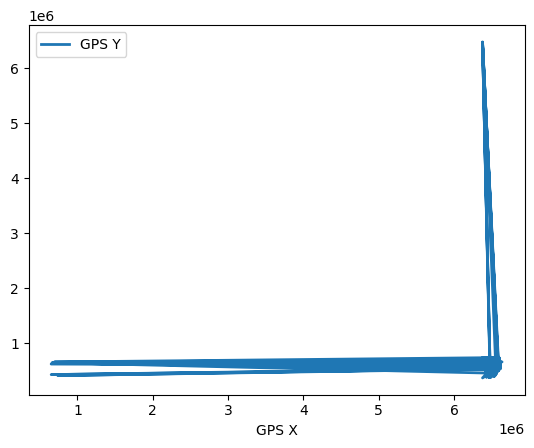

In [23]:
# plot
fig, ax = plt.subplots()

df.plot(x="GPS X", y="GPS Y", linewidth=2.0)

In [26]:
import pyproj

# Define the ETRS-LAEA projection (EPSG:3035)
etrs_laea = pyproj.Proj(init="EPSG:3857")

# Define the desired output projection (e.g., WGS84, EPSG:4326)
wgs84 = pyproj.Proj(init="EPSG:4326")

# Assuming your projected coordinates are stored in variables x and y
x = 6588678.0
y = 542647.0

# Convert the projected coordinates to latitude and longitude
lon, lat = pyproj.transform(etrs_laea, wgs84, x, y)

# The lon and lat variables now contain the converted longitude and latitude in decimal degrees
print("Longitude:", lon)
print("Latitude:", lat)

Longitude: 59.18710149542041
Latitude: 4.868810682981107


c:\Users\Merlin\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\Merlin\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Merlin\AppData\Local\Temp\ipykernel_18064\3713067441.py:14: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat 